Exercício - Hands on Machine Learning with Scikit-Learn and TensorFlow- Capitulo 2


In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Primeira etapa, carregar o dataset que será utilizado. Neste caso, esta em formato csv.

In [32]:
data = pd.read_csv('housing.csv', delimiter = ',')

Vamos analisar algumas informações básicas e de forma rápida do dataset carregado. 
O método head() permite olhar os primiros elementos do dataset. Bom para ter uma noção inicial de como estão os dados.
Já o método info(), acresenta mais informção com relação ao total de elementos, tipos das variáveis, se há valores nulos, colunas...


In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Parace que a caracteristica 'total_bedrooms' há elementos faltantes... Uma forma de visualizar isto, pode ser através do heatmap de elementos e o método isnull() do pandas. :) Mais interessante quando há mais elementos faltantes...

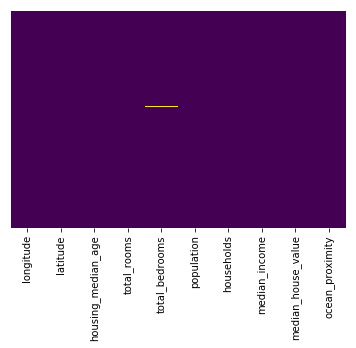

In [28]:
sns.heatmap(data.isnull(),cmap = 'viridis',yticklabels = False, cbar =False)

 A porcentagem faltande de dados para a caracteristica 'total_bedrooms' é de aprox 1%, muito? pouco?

In [27]:
PorcentagemFaltante = ( len(data) - data['total_bedrooms'].count())*100 / len(data)

1.002906976744186

Com exceção da caracteristica 'ocean_proximity', todas as outras são númericas. 'Ocean_proximity' por sua vez, é categorica. Quantas cetegorias são?

In [29]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

4 Categorias, sendo Island contendo apenas 5 amostras...

In [34]:
data[data['ocean_proximity']== 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C23705F8>,
      dtype=object)

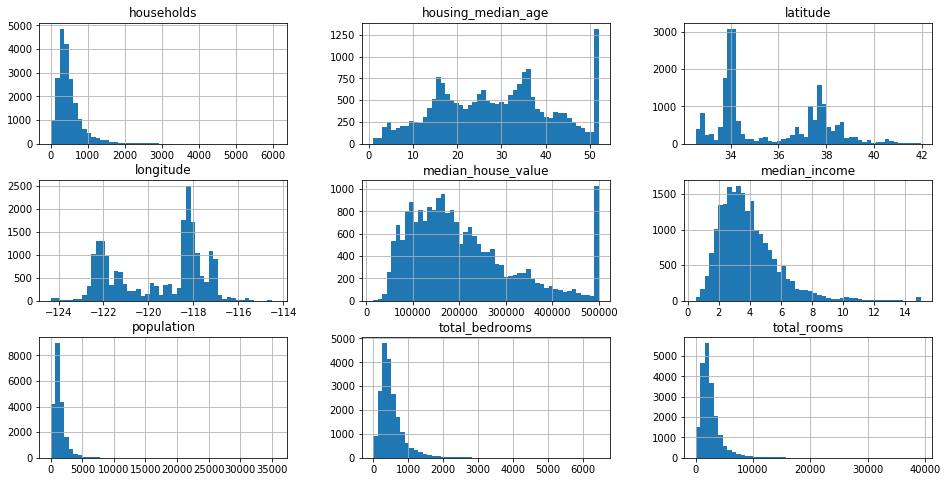

In [38]:
data.hist(bins = 50, figsize = (16,8))

Separando os dados em treinamento e teste

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [43]:
train_set.size

165120

In [44]:
test_set.size

41280